# Summarizing Hypothesis Testing 


## Example

You are working for a TexMex restaurant that recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data into the arrays no_queso and queso for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples.

The restaurant owners want to know if customers who order queso spend significantly more or significantly less than customers who do not order queso.

In [5]:
# import the necessary libraries

#data manip
import numpy as np
import pandas as pd 
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

#object import / export
import pickle




The assumption of normality is an important assumption for many statistical tests; you assume you are sampling from a normally distributed population. If you are not then you must attempt to make the data fit a normal distribution OR use another continuous distribution(more to come on this when we get to regression)

**1. Check for normality using a histogram, QQ-plot and Kolmogorov-Smirnov test.** 

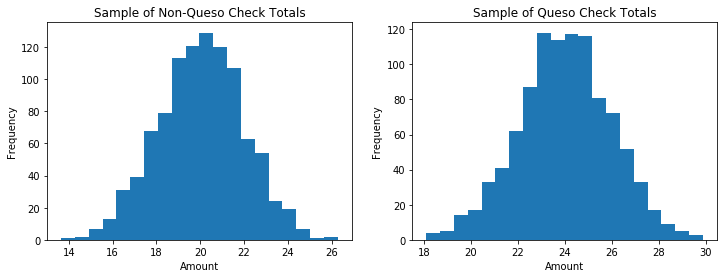

In [2]:
# Histogram check for normality 
# load the sample data 
no_queso = pickle.load(open("no_queso.pkl", "rb"))
queso = pickle.load(open("queso.pkl", "rb"))

# plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### What is a QQ-Plot? 

The purpose of Q Q plots is to find out if two sets of data come from the same type of distribution. It is used to assess normality. 

[How to read a QQ-plot](https://www.statisticshowto.com/q-q-plots/)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

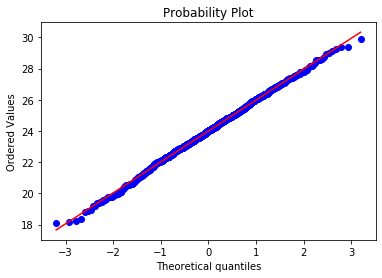

In [3]:
#plot QQ 
#fig = sm.qqplot(queso)
#plt.show()
scipy.stats.probplot(queso, dist="norm", plot=plt)

### What is a Kolmogorov-Smirnov test? 

The Kolmogorov-Smirnov Goodness of Fit Test (K-S test) compares your data with a known distribution and lets you know if they have the same distribution. .It’s also used to check the assumption of normality in Analysis of Variance. 

Perform the K-S test against a normal distribution with mean = 0 and sd = 3
If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution

In [4]:
scipy.stats.kstest(queso, 'norm', args=(0,3))

KstestResult(statistic=0.999999999188678, pvalue=0.0)

<details>
    <summary>1.3 What if our samples were not of equal size and variance? What could be done? </summary> 
    
<text> The Welch's T-Test(instead of the classic students t-test) could be substituted. The main difference is how the Welch's T calculates degrees of freedom. 

 $ \Large t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$
where  

* $\bar{X_i}$ - mean of sample i
* $s_i^2$ - variance of sample i
* $N_i$ - sample size of sample i  

</text>
</details>

### **2. Now that we've confirmed our samples are normal and have equal variance, run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$.** 

<details>
    <summary>2.1 Describe the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test. </summary> 
<code> 
Null hypothesis: Customers who order queso spend the same as those who do not order queso. 
Alternative hypothesis: Customers who order queso do not spend the same as those who do not order queso. 
</code>
</details>

<details>
    <summary>2.2 What type of statistical test(Z, T or F) should we run and why? </summary> 
    
<text> A two-tailed t-test because t-test are typically used when we need to determine if there is a statistically significant difference between two independent sample groups. We do not know the populations SD so z-test may not be the best choice. However, n>30 so we could use a z-test. F-tests are used in ANOVA when we have 3 or more groups to compare. 

</text>
</details>

<details>
    <summary>2.3 What does it mean to make Type I and Type II errors in this context? </summary> 
<code> 
Type I: (Rejecting the null hypothesis given it's true): Saying queso customers' total check amounts are different 
than non-queso customers' total check amounts when they are the same.

Type II: (Failing to reject the null hypothesis given it's false): Saying queso customers' total check amounts are 
the same as non-queso customers' total check amounts when they are different.
</code>
</details>

<details>
    <summary>2.4 What does statistical power have to do with type errors? </summary> 
<code> 
The statistical power of a study (sometimes called sensitivity OR recall) is how likely the study is to distinguish an actual effect from one of chance. It’s the likelihood that the test is correctly rejecting the null hypothesis (i.e. “proving” your hypothesis). For example, a study that has an 80% power means that the study has an 80% chance of the test having significant results.

![](https://www.statisticshowto.com/wp-content/uploads/2015/04/statistical-power.png)
</code>
</details>

In [6]:
# Run a two-tailed t-test
print(stats.ttest_ind(no_queso, queso))
print()
# compute the critical t-statistics for the rejection region
critical_t = (stats.t.ppf(0.025, df=999), stats.t.ppf(0.975, df=999))
print(critical_t)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

(-1.962341461133449, 1.9623414611334487)


<details>
    <summary>2.5  Can you reject the null hypothesis at a significance level of $\alpha = 0.05$? </summary> 
<text> We have enough evidence to reject the null hypothesis 
at a significance level of alpha = 0.05. We obtain a p-value
much smaller than 0.025 (two-tailed test). 
    
Alternatively: 
our t-statistic is smaller than the critical t-statistic.

Both answers (p-value or critical t-statistic) are valid

</text>
</details>

In [7]:
sample_mean_no_queso = np.mean(no_queso)
sample_mean_queso = np.mean(queso)
sample_std = np.std(no_queso)

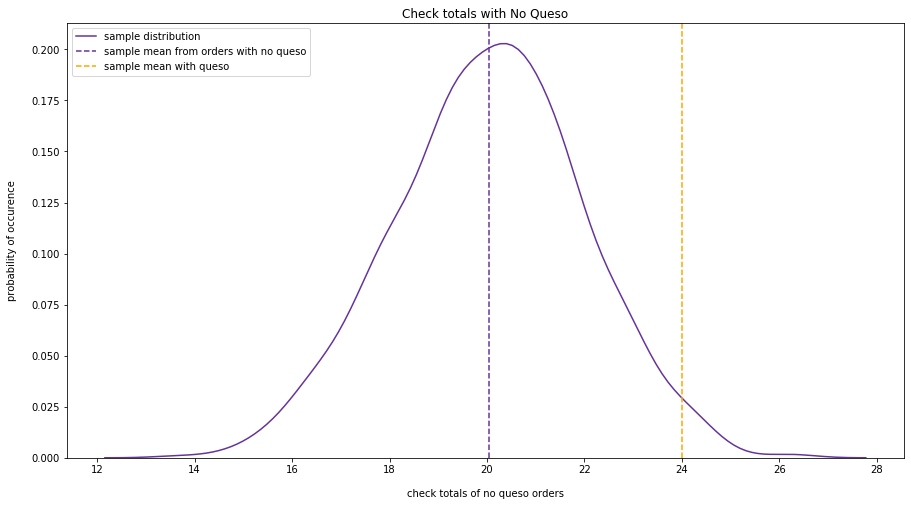

In [8]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.distplot(no_queso, hist=False, label='sample distribution', color='rebeccapurple')
plt.axvline(x=sample_mean_no_queso, color='rebeccapurple', linestyle='--', label="sample mean from orders with no queso")
plt.axvline(x=sample_mean_queso, color='orange', linestyle='--', label='sample mean with queso')
plt.xlabel("check totals of no queso orders", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Check totals with No Queso")
plt.legend();